# Tobi's Sales Analysis

We start by cleaning our data. Tasks during this section include:
- Drop NaN values from DataFrame
- Removing rows based on a condition
- Change the type of columns (to_numeric, to_datetime, astype)

Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore 5 high level business questions related to our data:
- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

To answer these questions we walk through many different pandas & matplotlib methods. They include:
- Concatenating multiple csvs together to create a new DataFrame (pd.concat)
- Adding columns
- Parsing cells as strings to make new columns (.str)
- Using the .apply() method
- Using groupby to perform aggregate analysis
- Plotting bar charts and lines graphs to visualize our results
- Labeling our graphs

#### Import Pandas Libraries

In [1]:
import pandas as pd

### 1) Merge 12 CSVs into a single dataframe

#### List all files in Sales_Data folder

In [2]:
# Set target path to Sales_Data
mypath = "Sales_Data"

# Create list of file names in Sales_Data folder
from os import listdir
from os.path import isfile, join
file_names = [mypath + "/" + f for f in listdir(mypath) if isfile(join(mypath, f))]

# Print each file name in list
print("File names:")
i = 1
for file in file_names:
    print("{}. {}".format(i, file))
    i += 1

File names:
1. Sales_Data/Sales_December_2019.csv
2. Sales_Data/Sales_April_2019.csv
3. Sales_Data/Sales_February_2019.csv
4. Sales_Data/Sales_March_2019.csv
5. Sales_Data/Sales_August_2019.csv
6. Sales_Data/Sales_May_2019.csv
7. Sales_Data/Sales_November_2019.csv
8. Sales_Data/Sales_October_2019.csv
9. Sales_Data/Sales_January_2019.csv
10. Sales_Data/Sales_September_2019.csv
11. Sales_Data/Sales_July_2019.csv
12. Sales_Data/Sales_June_2019.csv


#### Read in one of the files to see structure

In [3]:
dec_19_data = pd.read_csv(file_names[0])
dec_19_data.head()
#dec_19_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### 2) Add a month column

#### Create a Dictionary of dataframes

In [4]:
# Conver month to numer
## Create conversiondic
month_num = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12,
}

# Dictionary of data frames
dic = {}

# Set dic keys to month
# Set dic values to dataframe
for f in file_names:
    month = f[17:20]
    data = pd.read_csv(f)
    data['Month'] = month_num[month]
    dic[f[17:-9]] = data

# Concatenate datasets on month colum
data = pd.concat(list(dic.values()), ignore_index=True)
data_id = data.copy()
data_id = data_id.sort_values("Month").reset_index(drop=True)

#data_id.head()
data_id.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,316669,Lightning Charging Cable,1,14.95,12/30/19 21:37,"236 9th St, Atlanta, GA 30301",12
186846,316668,AAA Batteries (4-pack),3,2.99,12/06/19 22:26,"745 14th St, Dallas, TX 75001",12
186847,316667,Lightning Charging Cable,1,14.95,12/15/19 20:48,"95 Spruce St, Austin, TX 73301",12
186848,316665,Wired Headphones,1,11.99,12/07/19 18:09,"58 Sunset St, San Francisco, CA 94016",12
186849,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12


In [5]:
# Check data type of each column
#data_id.dtypes

# there seems to be sime invalid values
#data_id.iloc[254]

#### Cleanninf our data

We notice that many row contain the their respective column name. This was likely a mistace that occured in the creation of this data set. We can start by finding the number of occurance of these type of errors...

Next remove these rows

In [6]:
print(data_id.shape)
data_new = data_id.drop(labels=list(data_id[data_id["Product"] == "Product"].index), axis=0)
#data_new.shape

# Check for NAN values
data_new.isnull().sum()

data_clean = data_new.dropna(axis=0)
#data_clean.shape

(186850, 7)


In [7]:
# Change data types to numerical values where possible
## List of columns to be changed to numerical
c = list(data_clean.columns)
d = [c[1], c[4], c[5]]
c = [col for col in c if col not in d]

# Change data types to numerical values where possible
data_1 = data_clean.copy()
data_1[c] = data_clean[c].apply(pd.to_numeric)
data_1[d[1]] = data_clean[d[1]].astype('datetime64[s]')

#data_1.dtypes

### 3) Add a sales column

In [8]:
# Multiply quantity and price
data_2 = data_1.copy()
data_2["Sales"] = data_1["Quantity Ordered"] * data_1["Price Each"]
data_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",1,300.00
1,147400,27in 4K Gaming Monitor,1,389.99,2019-01-21 14:25:00,"713 Hill St, San Francisco, CA 94016",1,389.99
2,147401,Google Phone,1,600.00,2019-01-20 16:08:00,"78 Washington St, Portland, ME 04101",1,600.00
3,147402,Wired Headphones,1,11.99,2019-01-04 18:10:00,"420 Dogwood St, Austin, TX 73301",1,11.99
4,147403,Apple Airpods Headphones,1,150.00,2019-01-08 12:06:00,"423 5th St, Atlanta, GA 30301",1,150.00


## Question 1: What was the best month for sales?

In [9]:
# Group by month, then sum accross month
month_data = data_2.groupby("Month").sum()
month_data.head()

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1412070513,10868,1.805014e+06,1.815335e+06
2,1872819852,13461,2.190340e+06,2.203481e+06
3,2565198831,17006,2.793172e+06,2.809063e+06
4,3389478729,20568,3.373059e+06,3.396059e+06
5,3343907180,18657,3.127097e+06,3.144585e+06


In [10]:
#month_data.sort_values("Sales")

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

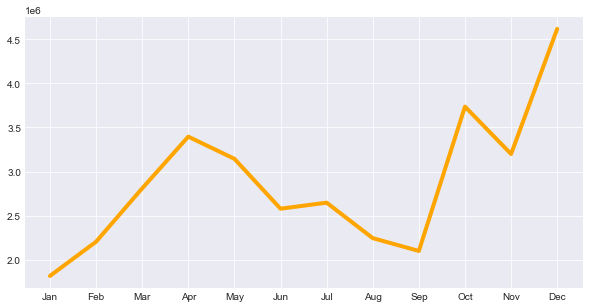

In [12]:
# Initialise figure
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
plt.plot(list(month_num.keys()),
         month_data['Sales'],
         marker='',
         color='orange',
         linewidth=4)

## Question 2: What city sold the most product?

In [13]:
# Use GeoPandas
import geopandas as gpd
from geopandas.tools import geocode
from geopy.geocoders import Nominatim
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [14]:
# Function to generate geopoints from address
def get_geocode(list):
    try:
        dic = {}
        for i, city in enumerate(list):
            point = geocode(city, provider='nominatim', user_agent="http://localhost:8888/lab").geometry.iloc[0]
            geom = pd.Series({'Latitude': point.y, 'Longitude': point.x, 'geometry': point})
            dic[city] = geom
        return dic
    except:
        return None

In [15]:
# Select City from each Purchase
data_3 = data_2.copy()
# Split Address into street, City, and P.O box
data_3["City"] = data_3["Purchase Address"].str.split(",")
# Select City
data_3["City"] = data_3["City"].map(lambda x: x[1][1:])

# To reduce geocoder run time
## Create a convertion dictionary
## Then set latt, long and geom to dic vals
city_lst = list(data_3["City"].unique())
city_dic = get_geocode(city_lst)
data_3[['Latitude', 'Longitude', 'geometry']] = data_3.apply(lambda x: city_dic[x["City"]], axis=1)

data_3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Latitude,Longitude,geometry
0,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",1,300.00,Atlanta,33.749099,-84.390185,POINT (-84.39018489999999 33.7490987)
1,147400,27in 4K Gaming Monitor,1,389.99,2019-01-21 14:25:00,"713 Hill St, San Francisco, CA 94016",1,389.99,San Francisco,37.779026,-122.419906,POINT (-122.4199061 37.7790262)
2,147401,Google Phone,1,600.00,2019-01-20 16:08:00,"78 Washington St, Portland, ME 04101",1,600.00,Portland,45.520247,-122.674195,POINT (-122.6741949 45.5202471)
3,147402,Wired Headphones,1,11.99,2019-01-04 18:10:00,"420 Dogwood St, Austin, TX 73301",1,11.99,Austin,30.271129,-97.743700,POINT (-97.74369950000001 30.2711286)
4,147403,Apple Airpods Headphones,1,150.00,2019-01-08 12:06:00,"423 5th St, Atlanta, GA 30301",1,150.00,Atlanta,33.749099,-84.390185,POINT (-84.39018489999999 33.7490987)


In [16]:
# Convert to geo data frame
data_geo = gpd.GeoDataFrame(data_3, geometry=data_3.geometry)
data_geo.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Latitude,Longitude,geometry
0,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",1,300.00,Atlanta,33.749099,-84.390185,POINT (-84.39018 33.74910)
1,147400,27in 4K Gaming Monitor,1,389.99,2019-01-21 14:25:00,"713 Hill St, San Francisco, CA 94016",1,389.99,San Francisco,37.779026,-122.419906,POINT (-122.41991 37.77903)
2,147401,Google Phone,1,600.00,2019-01-20 16:08:00,"78 Washington St, Portland, ME 04101",1,600.00,Portland,45.520247,-122.674195,POINT (-122.67419 45.52025)
3,147402,Wired Headphones,1,11.99,2019-01-04 18:10:00,"420 Dogwood St, Austin, TX 73301",1,11.99,Austin,30.271129,-97.743700,POINT (-97.74370 30.27113)
4,147403,Apple Airpods Headphones,1,150.00,2019-01-08 12:06:00,"423 5th St, Atlanta, GA 30301",1,150.00,Atlanta,33.749099,-84.390185,POINT (-84.39018 33.74910)


In [17]:
# Take relevant data 
city = data_geo[['City', 'geometry', 'Latitude','Longitude']].groupby(['City']).first()
city['purch'] = data_geo[['City', 'Quantity Ordered']].groupby(['City']).sum()
city['sales'] = data_geo[['City', 'Sales']].groupby(['City']).sum()
city = city.sort_values(by="sales", ascending=False)
lat, lon = list(city[["Latitude", "Longitude"]].mean())

city

,geometry,Latitude,Longitude,purch,sales
City,,,,,
San Francisco,POINT (-122.41991 37.77903),37.779026,-122.419906,50239,8.262204e+06
Los Angeles,POINT (-118.24277 34.05369),34.053691,-118.242767,33289,5.452571e+06
New York City,POINT (-74.00602 40.71273),40.712728,-74.006015,27932,4.664317e+06
Boston,POINT (-71.05829 42.36025),42.360253,-71.058291,22528,3.661642e+06
Atlanta,POINT (-84.39018 33.74910),33.749099,-84.390185,16602,2.795499e+06
Dallas,POINT (-96.79686 32.77627),32.776272,-96.796856,16730,2.767975e+06
Seattle,POINT (-122.33006 47.60383),47.603832,-122.330062,16553,2.747755e+06
Portland,POINT (-122.67419 45.52025),45.520247,-122.674195,14053,2.320491e+06
Austin,POINT (-97.74370 30.27113),30.271129,-97.743700,11153,1.819582e+06


In [19]:
# Create a map
m = folium.Map(width=600,height=500,location=[lat,lon], tiles='Stamen Terrain', zoom_start=4)

# Add points to the map
for idx, row in city.iterrows():
    Marker([row['Latitude'], row['Longitude']], 
           popup=idx).add_to(m)


# Display the map
m

[Text(0, 0, 'San Francisco'),
 Text(0, 0, 'Los Angeles'),
 Text(0, 0, 'New York City'),
 Text(0, 0, 'Boston'),
 Text(0, 0, 'Atlanta'),
 Text(0, 0, 'Dallas'),
 Text(0, 0, 'Seattle'),
 Text(0, 0, 'Portland'),
 Text(0, 0, 'Austin')]

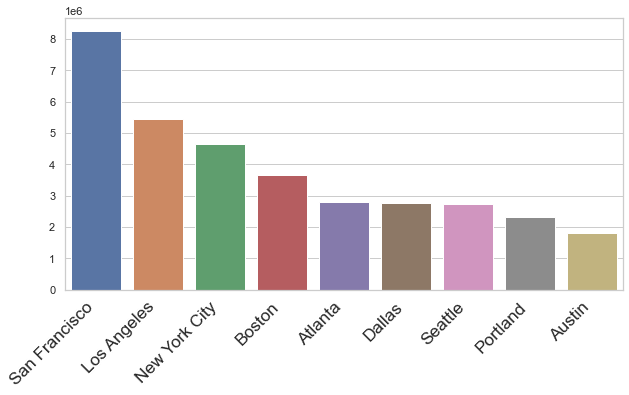

In [18]:
# Set background to gridlines
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
chart = sns.barplot(x=list(city.index), y=list(city['sales']))
chart.set_xticklabels(city.index, rotation=45, 
                      horizontalalignment='right', 
                      fontweight='light', fontsize='x-large')

## Question 3: What time should we display advertisements to maximize the likelihood of purchases?

In [20]:
# We wan to specifically look at foot traffic not order quantity
# To do so each order will treated equally

# Distribution plots
## Matplot and Seaborn

In [21]:
data_4 = data_3[["Quantity Ordered", "Order Date", "City"]]
data_4["Hour"] = pd.to_datetime(data_4['Order Date']).dt.hour

<ipython-input-21-887337db889c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4["Hour"] = pd.to_datetime(data_4['Order Date']).dt.hour


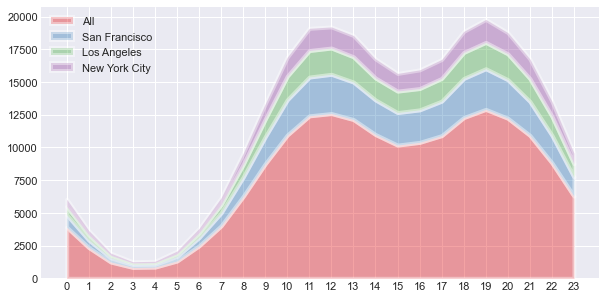

In [22]:
d_al = list(data_4.groupby(['Hour']).count()["Quantity Ordered"].values)
d_sf = list(data_4[data_4["City"]=="San Francisco"].groupby(['Hour']).count()["Quantity Ordered"].values)
d_la = list(data_4[data_4["City"]=="Los Angeles"].groupby(['Hour']).count()["Quantity Ordered"].values)
d_ny = list(data_4[data_4["City"]=="New York City"].groupby(['Hour']).count()["Quantity Ordered"].values)

keys = [pair for pair, df in data_4.groupby(['Hour'])]

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
pal = sns.color_palette("Set1")
label = ["All", "San Francisco", "Los Angeles", "New York City"]

plt.stackplot(keys,
             [d_al, d_sf, d_la, d_ny],
             colors=pal, alpha=0.4,
             linewidth=4, labels=label)

plt.legend(loc='upper left')
plt.xticks(keys)
plt.show()

## Question 4: What products are most often sold together?

## Question 5: What product sold the most? Why do you think it did?

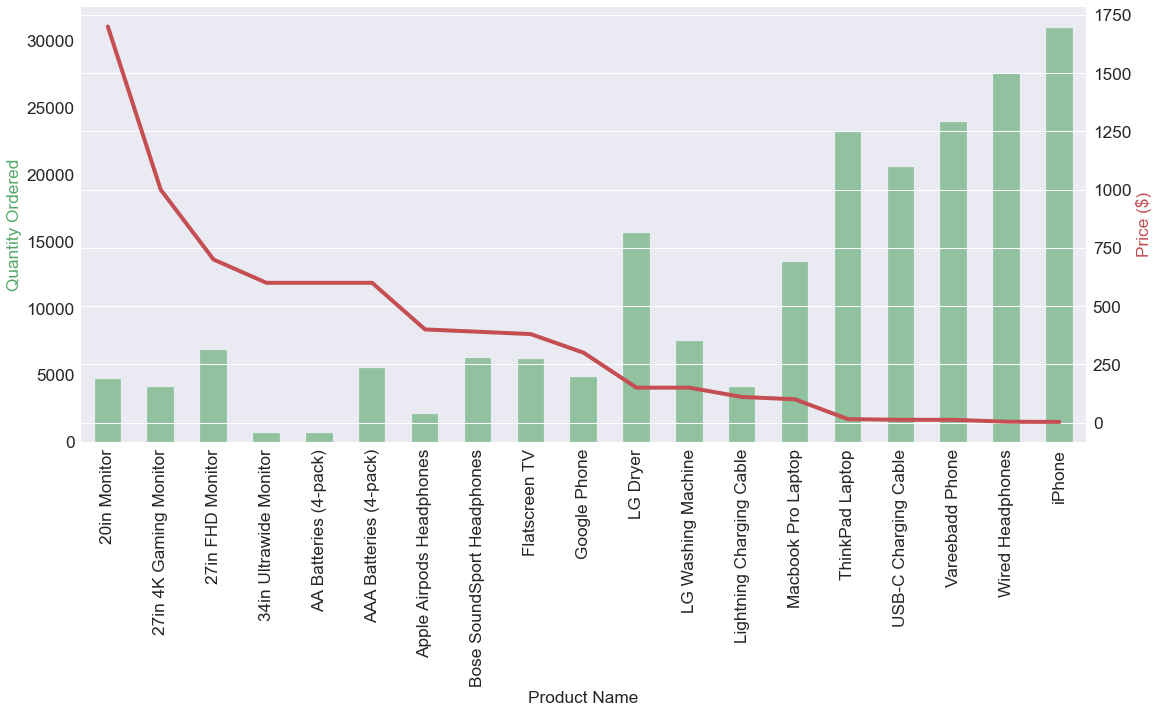

In [23]:
all_data = data_2.copy()
product_group = all_data.groupby('Product')


pric = product_group.mean()['Price Each'].sort_values(ascending=False)
quan = product_group.sum()['Quantity Ordered'].sort_values(ascending=False)
quan = quan[pric.index]
keys = [pair for pair, df in product_group]

plt.style.use('seaborn')
plt.figure(figsize=(18,8))
ax1 = quan.plot(kind='bar', color='g', alpha=0.6)
ax2 = pric.plot(secondary_y=True, color='r', linewidth=4, fontsize='x-large')

ax1.set_xlabel('Product Name', fontweight='light', fontsize='x-large')
ax1.set_ylabel('Quantity Ordered', color='g', fontweight='light', fontsize='x-large')
ax2.set_ylabel('Price ($)', color='r', fontweight='light', fontsize='x-large')
ax1.set_xticklabels(keys, rotation='vertical', size=8, fontweight='light', fontsize='x-large')

plt.show()